<a href="https://colab.research.google.com/github/Vlad-Pavliyk/-/blob/main/lab13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Завантаження даних...
--2025-05-27 11:16:17--  https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [application/octet-stream]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2025-05-27 11:16:17 (14.7 MB/s) - ‘spam.csv’ saved [503663/503663]


Аналіз даних...

Розмір датасету: (5572, 2)

Перші 5 записів:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4

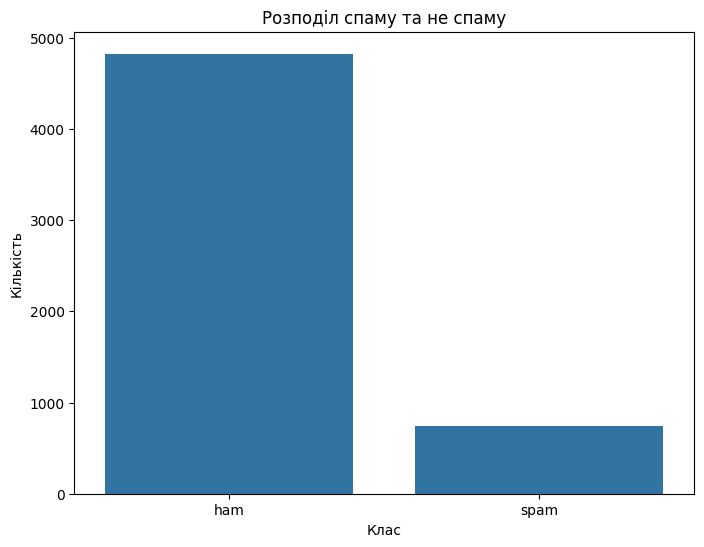

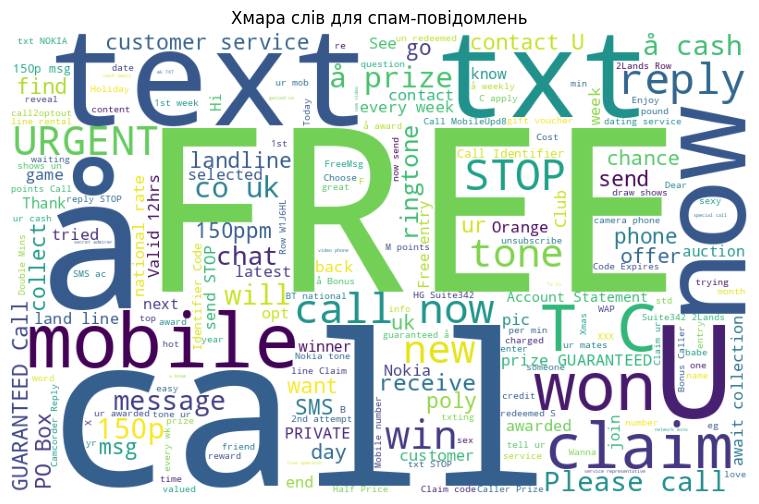

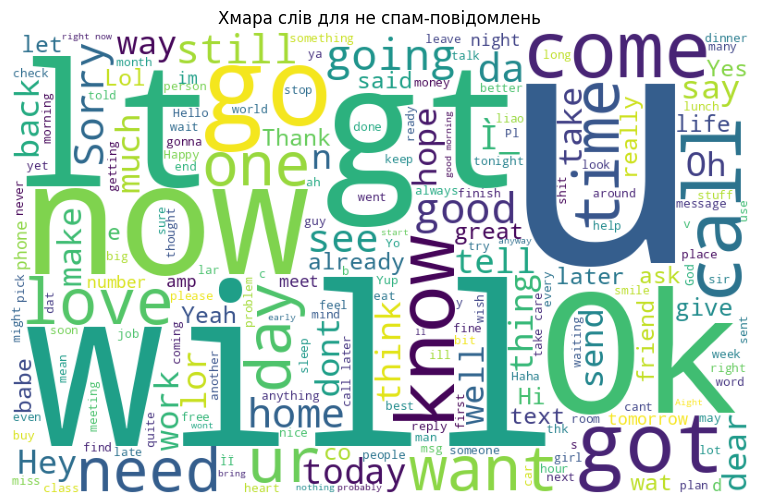


Підготовка даних...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [1]:
# Імпорт бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

# 1. Завантаження та підготовка даних
# --------------------------------------------------
print("Завантаження даних...")

# Завантаження датасету (для Colab)
!wget -O spam.csv https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv

# Зчитування даних
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Вибір потрібних стовпців
df.columns = ['label', 'message']  # Перейменування стовпців

# 2. Аналіз даних
# --------------------------------------------------
print("\nАналіз даних...")

# Основна інформація
print(f"\nРозмір датасету: {df.shape}")
print(f"\nПерші 5 записів:\n{df.head()}")
print(f"\nКількість повідомлень за класом:\n{df['label'].value_counts()}")
print(f"\nВідсоткове співвідношення:\n{df['label'].value_counts(normalize=True).round(2) * 100}")

# Візуалізація розподілу класів
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Розподіл спаму та не спаму')
plt.xlabel('Клас')
plt.ylabel('Кількість')
plt.show()

# Хмара слів для спаму
spam_words = ' '.join(df[df['label'] == 'spam']['message'])
spam_wordcloud = WordCloud(width=800, height=500, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud)
plt.title('Хмара слів для спам-повідомлень')
plt.axis('off')
plt.show()

# Хмара слів для не спаму
ham_words = ' '.join(df[df['label'] == 'ham']['message'])
ham_wordcloud = WordCloud(width=800, height=500, background_color='white').generate(ham_words)
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud)
plt.title('Хмара слів для не спам-повідомлень')
plt.axis('off')
plt.show()

# 3. Підготовка даних для моделі
# --------------------------------------------------
print("\nПідготовка даних...")

# Кодування міток
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Токенізація та видалення стоп-слів
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df['processed_text'] = df['message'].apply(preprocess_text)

# Розділення на тренувальний та тестовий набори
X = df['processed_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизація тексту
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Побудова та оцінка моделі
# --------------------------------------------------
print("\nПобудова моделі...")

# Навчання моделі Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Прогнозування на тестовому наборі
y_pred = model.predict(X_test_vec)

# Оцінка моделі
print("\nЗвіт про класифікацію:\n", classification_report(y_test, y_pred))
print("\nМатриця плутанини:\n", confusion_matrix(y_test, y_pred))
print("\nТочність моделі: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# 5. Виведення 200 повідомлень з прогнозами
# --------------------------------------------------
print("\nВиведення 200 повідомлень з прогнозами...")

# Створення DataFrame з результатами
results_df = pd.DataFrame({
    'Повідомлення': X_test[:200],
    'Справжній клас': y_test[:200].map({0: 'ham', 1: 'spam'}),
    'Прогнозований клас': y_pred[:200].map({0: 'ham', 1: 'spam'})
})

# Додавання індикатора вірності прогнозу
results_df['Вірно?'] = np.where(results_df['Справжній клас'] == results_df['Прогнозований клас'], 'Так', 'Ні')

# Виведення результатів
pd.set_option('display.max_colwidth', 100)
print(results_df.sample(20))  # Виводимо випадкові 20 з 200 для прикладу

# Збереження всіх результатів у файл
results_df.to_csv('sms_predictions.csv', index=False)
print("\nУсі 200 результатів збережено у файл 'sms_predictions.csv'")

# Додаткова візуалізація результатів
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_test[:200])), y=y_test[:200], hue=y_pred[:200], palette='viridis')
plt.title('Порівняння справжніх та прогнозованих міток (200 повідомлень)')
plt.xlabel('Номер повідомлення')
plt.ylabel('Клас (0=ham, 1=spam)')
plt.legend(title='Прогноз')
plt.show()